### Initialization

In [253]:
import tensorflow as tf
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

In [254]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [255]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [265]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
pd.options.display.max_rows = 10

### Data Loading

#### Data Description
(For easy reference)
##### vehicle
- atvtype - type of alternative fuel or advanced technology vehicle
- barrels08 - annual petroleum consumption in barrels for fuelType1 (1)
- barrelsA08 - annual petroleum consumption in barrels for fuelType2 (1)
- charge120 - time to charge an electric vehicle in hours at 120 V
- charge240 - time to charge an electric vehicle in hours at 240 V
- city08 - city MPG for fuelType1 (2), (11)
- city08U - unrounded city MPG for fuelType1 (2), (3)
- cityA08 - city MPG for fuelType2 (2)
- cityA08U - unrounded city MPG for fuelType2 (2), (3)
- cityCD - city gasoline consumption (gallons/100 miles) in charge depleting mode (4)
- cityE - city electricity consumption in kw-hrs/100 miles
- cityUF - EPA city utility factor (share of electricity) for PHEV
- co2 - tailpipe CO2 in grams/mile for fuelType1 (5)
- co2A - tailpipe CO2 in grams/mile for fuelType2 (5)
- co2TailpipeAGpm - tailpipe CO2 in grams/mile for fuelType2 (5)
- co2TailpipeGpm- tailpipe CO2 in grams/mile for fuelType1 (5)
- comb08 - combined MPG for fuelType1 (2), (11)
- comb08U - unrounded combined MPG for fuelType1 (2), (3)
- combA08 - combined MPG for fuelType2 (2)
- combA08U - unrounded combined MPG for fuelType2 (2), (3)
- combE - combined electricity consumption in kw-hrs/100 miles
- combinedCD - combined gasoline consumption (gallons/100 miles) in charge depleting mode (4)
- combinedUF - EPA combined utility factor (share of electricity) for PHEV
- cylinders - engine cylinders
- displ - engine displacement in liters
- drive - drive axle type
- emissionsList
- engId - EPA model type index
- eng_dscr - engine descriptor; see http://www.fueleconomy.gov/feg/findacarhelp.shtml#engine
- evMotor - electric motor (kw-hrs)
- feScore - EPA Fuel Economy Score (-1 = Not available)
- fuelCost08 - annual fuel cost for fuelType1 ($) (7)
- fuelCostA08 - annual fuel cost for fuelType2 ($) (7)
- fuelType - fuel type with fuelType1 and fuelType2 (if applicable)
- fuelType1 - fuel type 1. For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.
- fuelType2 - fuel type 2. For dual fuel vehicles, this will be the alternative fuel (e.g. E85, Electricity, CNG, LPG). For single fuel vehicles, this field is not used
- ghgScore - EPA GHG score (-1 = Not available)
- ghgScoreA - EPA GHG score for dual fuel vehicle running on the alternative fuel (-1 = Not available)
- guzzler- if G or T, this vehicle is subject to the gas guzzler tax
- highway08 - highway MPG for fuelType1 (2), (11)
- highway08U - unrounded highway MPG for fuelType1 (2), (3)
- highwayA08 - highway MPG for fuelType2 (2)
- highwayA08U - unrounded highway MPG for fuelType2 (2),(3)
- highwayCD - highway gasoline consumption (gallons/100miles) in charge depleting mode (4)
- highwayE - highway electricity consumption in kw-hrs/100 miles
- highwayUF - EPA highway utility factor (share of electricity) for PHEV
- hlv - hatchback luggage volume (cubic feet) (8)
- hpv - hatchback passenger volume (cubic feet) (8)
- id - vehicle record id
- lv2 - 2 door luggage volume (cubic feet) (8)
- lv4 - 4 door luggage volume (cubic feet) (8)
- make - manufacturer (division)
- mfrCode - 3-character manufacturer code
- model - model name (carline)
- mpgData - has My MPG data; see yourMpgVehicle and yourMpgDriverVehicle
- phevBlended - if true, this vehicle operates on a blend of gasoline and electricity in charge depleting mode
- pv2 - 2-door passenger volume (cubic feet) (8)
- pv4 - 4-door passenger volume (cubic feet) (8)
- rangeA - EPA range for fuelType2
- rangeCityA - EPA city range for fuelType2
- rangeHwyA - EPA highway range for fuelType2
- trans_dscr - transmission descriptor; see http://www.fueleconomy.gov/feg/findacarhelp.shtml#trany
- trany - transmission
- UCity - unadjusted city MPG for fuelType1; see the description of the EPA test procedures
- UCityA - unadjusted city MPG for fuelType2; see the description of the EPA test procedures
- UHighway - unadjusted highway MPG for fuelType1; see the description of the EPA test procedures
- UHighwayA - unadjusted highway MPG for fuelType2; see the description of the EPA test procedures
- VClass - EPA vehicle size class
- year - model year
- youSaveSpend - you save/spend over 5 years compared to an average car ($). Savings are positive; a greater amount spent yields a negative number. For dual fuel vehicles, this is the cost savings for gasoline
- sCharger - if S, this vehicle is supercharged
- tCharger - if T, this vehicle is turbocharged
- c240Dscr - electric vehicle charger description
- charge240b - time to charge an electric vehicle in hours at 240 V using the alternate charger
- c240bDscr - electric vehicle alternate charger description
- createdOn - date the vehicle record was created (ISO 8601 format)
- modifiedOn - date the vehicle record was last modified (ISO 8601 format)
- startStop - vehicle has start-stop technology (Y, N, or blank for older vehicles)
- phevCity - EPA composite gasoline-electricity city MPGe for plug-in hybrid vehicles
- phevHwy - EPA composite gasoline-electricity highway MPGe for plug-in hybrid vehicles
- phevComb - EPA composite gasoline-electricity combined city-highway MPGe for plug-in hybrid vehicles

In [266]:
%time data = pd.read_csv('data/vehicles.csv')
data.reset_index(inplace=True,drop=True)

Wall time: 424 ms


In [267]:
data.shape

(40081, 83)

In [268]:
vehicles_df = data.copy()
vehicles_df.head(100)

,barrels08,barrelsA08,charge120,charge240,city08,...,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,16.480500,0.0,0.0,0.0,17,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
96,16.480500,0.0,0.0,0.0,17,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
97,18.311667,0.0,0.0,0.0,15,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
98,18.311667,0.0,0.0,0.0,15,...,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


## Data Cleaning & Preparation

### Identify Null Values
Identify null values in all records and impute it with corresponding value based on the column data type and characterstic

In [269]:
df_nan = pd.DataFrame({'Null Count': vehicles_df.isnull().sum(),
                        'Null %':vehicles_df.isna().mean().round(4) * 100}, 
                      columns=['Null Count' , 'Null %'])
print(df_nan[df_nan['Null Count'] > 0])

           Null Count  Null %
cylinders         171    0.43
displ             169    0.42
drive            1189    2.97
eng_dscr        15899   39.67
trany              11    0.03
...               ...     ...
evMotor         39345   98.16
mfrCode         30818   76.89
c240Dscr        40016   99.84
c240bDscr       40018   99.84
startStop       31704   79.10

[17 rows x 2 columns]


### Impute Null Values

Apparently the cylinders & displ columns are null for atvType = EV (Electric vehicle)

In [270]:
#displ
vehicles_df[vehicles_df['displ'].isnull()].atvType.value_counts()
# impute null values with columns mean
vehicles_df['displ']=vehicles_df['displ'].fillna(vehicles_df['displ'].mean())

Fill in the drive with drive mode value (fill NaNs with the most frequent value)

In [271]:
#drive,cylinders
vehicles_df['drive'] = vehicles_df['drive'].fillna(vehicles_df['drive'].mode().iloc[0])
vehicles_df['cylinders'] = vehicles_df['cylinders'].fillna(vehicles_df['cylinders'].mode().iloc[0])

In [272]:
#convert city08 as flot    
vehicles_df['city08']=vehicles_df['city08'].astype(float)

Apparently the null trany related to atvType = EV (Electric vehicle). Let's check what is the most common trany for EV cars ?
use the most frequent Trany type for EV cars to impute the null Trany column



In [273]:
#trany
vehicles_df[vehicles_df['trany'].isnull()].atvType.value_counts()
# Let's check what is the most common trany for EV cars ?
vehicles_df[vehicles_df['atvType']=='EV'].trany.value_counts()
#use the most frequent Trany type for EV cars to impute the null Trany column
vehicles_df['trany'] = vehicles_df['trany'].fillna(vehicles_df[vehicles_df['atvType']=='EV']['trany'].mode().iloc[0])

tCharger: if T, this vehicle is turbocharged. We will assume if vehicle is tCharger then tCharger=1 else =0

In [274]:
print(vehicles_df['tCharger'].value_counts())
vehicles_df ['tCharger'] = vehicles_df['tCharger'].fillna(0)
vehicles_df.loc[vehicles_df["tCharger"] =='T' ,"tCharger"]= 1

T    6302
Name: tCharger, dtype: int64


sCharger: if S, this vehicle is supercharged. We will assume if vehicle is supercharged then supercharged=1 else =0

In [275]:
print(vehicles_df['sCharger'].value_counts())
vehicles_df ['sCharger'] = vehicles_df['sCharger'].fillna(0)
vehicles_df.loc[vehicles_df["sCharger"] =='S' ,"sCharger"]= 1

S    796
Name: sCharger, dtype: int64


- Impute null values with "Unknown"

In [276]:
print(vehicles_df['atvType'].value_counts())
vehicles_df ['atvType'] = vehicles_df['atvType'].fillna('Unknown')

print(vehicles_df['fuelType2'].value_counts())
vehicles_df ['fuelType2'] = vehicles_df['fuelType2'].fillna('Unknown')
            
print(vehicles_df['evMotor'].value_counts())
#This is an EV cars related variable, we assume the missing values are for non EV cars. will impute it with N/A
vehicles_df ['evMotor'] = vehicles_df['evMotor'].fillna('N/A')

FFV               1412
Diesel            1070
Hybrid             539
EV                 168
Plug-in Hybrid     107
CNG                 50
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: atvType, dtype: int64
E85            1412
Electricity     107
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64
288V Ni-MH                   122
245V Ni-MH                    48
144V Li-Ion                   28
270V Li-Ion                   26
330V Ni-MH                    26
                            ... 
24 KW AC Synchronous           1
59 and 61 kW 3-Phase AC        1
147 and 211 kW AC 3-Phase      1
192 kW AC 3-Phase              1
110 kW DCPM                    1
Name: evMotor, Length: 140, dtype: int64


In [277]:
print(vehicles_df['startStop'].value_counts())
#- startStop - vehicle has start-stop technology (Y, N, or blank for older vehicles)
# We will impute null values with "N"
vehicles_df ['startStop'] = vehicles_df['startStop'].fillna('N')
# #We will create a new variable to diffrentiate between old and new vehicles
vehicles_df.loc[vehicles_df["startStop"] =='Y' ,"startStop"]= 1
vehicles_df.loc[vehicles_df["startStop"] =='N' ,"startStop"]= 0
print(vehicles_df['startStop'].value_counts())
# print(vehicles_df['new_vehicle'].value_counts())

N    5695
Y    2682
Name: startStop, dtype: int64
0    37399
1     2682
Name: startStop, dtype: int64


In [278]:
#mpgData convert to 0,1
vehicles_df.loc[vehicles_df["mpgData"] =='Y' ,"mpgData"]= 1
vehicles_df.loc[vehicles_df["mpgData"] =='N' ,"mpgData"]= 0


### Drop columns that are not neccessary for the analysis

In [279]:
cols_to_drop = ['id', 'createdOn','modifiedOn' ,'engId','mfrCode','barrelsA08','charge240','cityA08','co2','co2A','co2TailpipeAGpm','comb08U','combA08','feScore','fuelCostA08','ghgScore','ghgScoreA','highway08U','highwayA08',
                'hlv','hpv','lv2','lv4','pv2','UHighwayA','UCityA','city08']
# vehicles_df.drop(cols_to_drop,inplace=True,axis=1)

# Drop columns with single value
for col in vehicles_df.columns:
    if len(vehicles_df[col].unique()) == 1:
        print (f'Constant column {col} to be dropped.')
        cols_to_drop.append(col)

Constant column charge120 to be dropped.


eng_dscr is rich feature, can be used in feature engineering (to extract extra features about the engine), but we will drop it for now due to time limitaiton



In [280]:
#eng_dscr
vehicles_df.eng_dscr.value_counts()
#eng_dscr can be used in feature engineering (to extract extra features about the engine types), but we will drop it for now due to time limitaiton
cols_to_drop.append('eng_dscr')

guzzler: 94% missing values. if G or T, this vehicle is subject to the gas guzzler tax. will be dropped

In [281]:
#guzzler:if G or T, this vehicle is subject to the gas guzzler tax
vehicles_df['guzzler'].value_counts()
cols_to_drop.append('guzzler')

trans_dscr can be used in feature engineering (to extract extra features), but it would need futher text cleansing though. we will drop it for now due to time limitaiton

In [282]:
#eng_dscr can be used in feature engineering (to extract extra features), but it would need futher text cleansing though. we will drop it for now due to time limitaiton
cols_to_drop.append('trans_dscr')

In [283]:
vehicles_df['rangeA'].value_counts()
#rangeA will need extra data handling, it has 96% missing values, will be dropped
cols_to_drop.append('rangeA')

In [284]:
print(vehicles_df['c240Dscr'].value_counts())
#c240Dscr has ~ 99.84% missing values, will be dropped
cols_to_drop.append('c240Dscr')

standard charger    54
3.6 kW charger       4
single charger       3
7.2 kW charger       2
6.6 kW charger       2
Name: c240Dscr, dtype: int64


In [285]:
print(vehicles_df['c240bDscr'].value_counts())
#c240bDscr has ~ 99.84% missing values, will be dropped
cols_to_drop.append('c240bDscr')

80 amp dual charger    54
6.6 kW charger          4
dual charger            3
3.6 kW charger          2
Name: c240bDscr, dtype: int64


In [286]:
#Drop all not-wanted columns
vehicles_df = vehicles_df.drop(cols_to_drop, axis=1)

In [287]:
#check no more nulls 
print(vehicles_df[vehicles_df.columns[vehicles_df.isnull().sum() >0]].isna().mean().round(4) * 100)
vehicles_df.shape

Series([], dtype: float64)


(40081, 49)

### Check columns Data Types and apply needed conversion

In [288]:
vehicles_df.describe(include = 'all')

,barrels08,city08U,cityA08U,cityCD,cityE,...,charge240b,startStop,phevCity,phevHwy,phevComb
count,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,...,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000
unique,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
mean,17.363564,5.494777,0.466164,0.000471,0.274113,...,0.007497,0.066914,0.122851,0.123375,0.122527
...,...,...,...,...,...,...,...,...,...,...,...
min,0.060000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,12.273600,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000


In [289]:
pd.DataFrame(vehicles_df.dtypes, columns=['dtype'])

,dtype
barrels08,float64
city08U,float64
cityA08U,float64
cityCD,float64
cityE,float64
...,...
charge240b,float64
startStop,int64
phevCity,int64
phevHwy,int64


In [290]:
vehicles_df['cylinders'].value_counts()

4.0     15646
6.0     13912
8.0      8645
5.0       769
12.0      608
3.0       274
10.0      161
2.0        57
16.0        9
Name: cylinders, dtype: int64

In [291]:
#Convert cylinders to Categorical variable
vehicles_df['cylinders'] = vehicles_df['cylinders'].astype(int).astype(str)
vehicles_df['cylinders']='c_'+vehicles_df['cylinders']

In [292]:
obj_cols = list(vehicles_df.loc[:, (vehicles_df.dtypes == object) ].columns)

In [293]:
obj_cols

['cylinders',
 'drive',
 'fuelType',
 'fuelType1',
 'make',
 'model',
 'trany',
 'VClass',
 'atvType',
 'fuelType2',
 'evMotor']

In [294]:
for col in obj_cols:
    print(f"col: {col}")
    print(vehicles_df[col].value_counts().count())

col: cylinders
9
col: drive
8
col: fuelType
14
col: fuelType1
6
col: make
135
col: model
3960
col: trany
37
col: VClass
34
col: atvType
9
col: fuelType2
5
col: evMotor
141


In [295]:
pd.DataFrame(vehicles_df.dtypes, columns=['dtype'])

,dtype
barrels08,float64
city08U,float64
cityA08U,float64
cityCD,float64
cityE,float64
...,...
charge240b,float64
startStop,int64
phevCity,int64
phevHwy,int64


In [296]:
vehicles_df[vehicles_df['UCity']<9]

,barrels08,city08U,cityA08U,cityCD,cityE,...,charge240b,startStop,phevCity,phevHwy,phevComb
1770,41.201250,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
2817,36.623333,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
7901,47.087143,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
8127,29.964545,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
8128,29.964545,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
34427,41.201250,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
34824,47.087143,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
36098,47.087143,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0
38520,41.201250,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0


### Clean Data

In [297]:
# clean up records with 0 UCity value
# Drop any instances where UCity = 0 or Nan
print(f'No of rows before removing 0 values Ucity:{vehicles_df.shape[0]}')
vehicles_df = vehicles_df[(vehicles_df['UCity']!=0) & (vehicles_df['UCity'].notnull())]
print (f'No of rows before removing 0 values Ucity:{vehicles_df.shape[0]}')

No of rows before removing 0 values Ucity:40081
No of rows before removing 0 values Ucity:40056


After dropping the instances with 0 UCity, the minimum is 7 MPG (for Lamborghini, Countach 1988) which looks legit after Googling it 

In [298]:
vehicles_df[['year','make','model','UCity']].sort_values(by='UCity',ascending=True).head(5)

,year,make,model,UCity
33574,1988,Lamborghini,Countach,7.0
7901,1986,Lamborghini,Countach,7.0
34824,1989,Lamborghini,Countach,7.0
21060,1987,Lamborghini,Countach,7.0
36098,1990,Lamborghini,Countach,7.0


The top MPG looks higher than normal, but it seems it was pumped up, they are not matching the actual values for the mentioned cars on Google

In [299]:
vehicles_df[['year','make','model','UCity']].sort_values(by='UCity',ascending=False).head(50)

,year,make,model,UCity
31242,2017,Hyundai,Ioniq Electric,224.8000
33409,2019,Hyundai,Ioniq Electric,224.8000
32585,2018,Hyundai,Ioniq Electric,224.8000
25615,2013,Scion,iQ EV,197.5771
28587,2015,BMW,i3 BEV,196.4000
...,...,...,...,...
25613,2013,smart,fortwo electric drive convertible,173.8000
28413,2015,smart,fortwo electric drive convertible,173.8000
28414,2015,smart,fortwo electric drive coupe,173.8000
26806,2014,smart,fortwo electric drive convertible,173.8000


#### Drop columns with majority 0

In [300]:
# Drop columns with majority 0 values of 97.00%
print(vehicles_df.shape)
vehicles_df = vehicles_df.loc[:, (vehicles_df == 0).sum() < len(vehicles_df) *(97/100)]
print(vehicles_df.shape)

(40056, 49)
(40056, 26)


### Feature Engineering

In [301]:
vehicles_df.loc[vehicles_df['youSaveSpend'] > 0, 'youSave'] = 1
vehicles_df.loc[vehicles_df['youSaveSpend'] <= 0, 'youSave'] = 0

vehicles_df.loc[vehicles_df['youSaveSpend'] <= 0, 'saveAmount'] = 0
vehicles_df.loc[vehicles_df['youSaveSpend'] <= 0, 'spendAmount'] = vehicles_df['youSaveSpend']*-1

vehicles_df.loc[vehicles_df['youSaveSpend'] > 0, 'saveAmount'] = vehicles_df['youSaveSpend']
vehicles_df.loc[vehicles_df['youSaveSpend'] > 0, 'spendAmount'] = 0

vehicles_df.loc[vehicles_df['youSaveSpend'] >= 0, 'youSpend'] = 0
vehicles_df.loc[vehicles_df['youSaveSpend'] < 0, 'youSpend'] = 1

vehicles_df=vehicles_df.drop('youSaveSpend', axis=1)

In [302]:
vehicles_df.describe()

,barrels08,city08U,co2TailpipeGpm,comb08,displ,...,startStop,youSave,saveAmount,spendAmount,youSpend
count,40056.000000,40056.000000,40056.000000,40056.000000,40056.000000,...,40056.000000,40056.000000,40056.000000,40056.000000,40056.000000
mean,17.362407,5.498207,468.427994,20.466397,3.300339,...,0.066956,0.070976,83.464400,4215.741712,0.913197
std,4.589548,11.030579,122.778199,7.241420,1.355995,...,0.249949,0.256787,423.479832,3116.915413,0.281550
min,0.060000,0.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,386.391304,17.000000,2.200000,...,0.000000,0.000000,0.000000,2000.000000,1.000000
50%,16.480500,0.000000,447.000000,20.000000,3.000000,...,0.000000,0.000000,0.000000,4000.000000,1.000000
75%,19.388824,12.280300,523.000000,23.000000,4.300000,...,0.000000,0.000000,0.000000,5750.000000,1.000000
max,47.087143,150.000000,1269.571429,136.000000,8.400000,...,1.000000,1.000000,5250.000000,29000.000000,1.000000


### Check Data Correlation

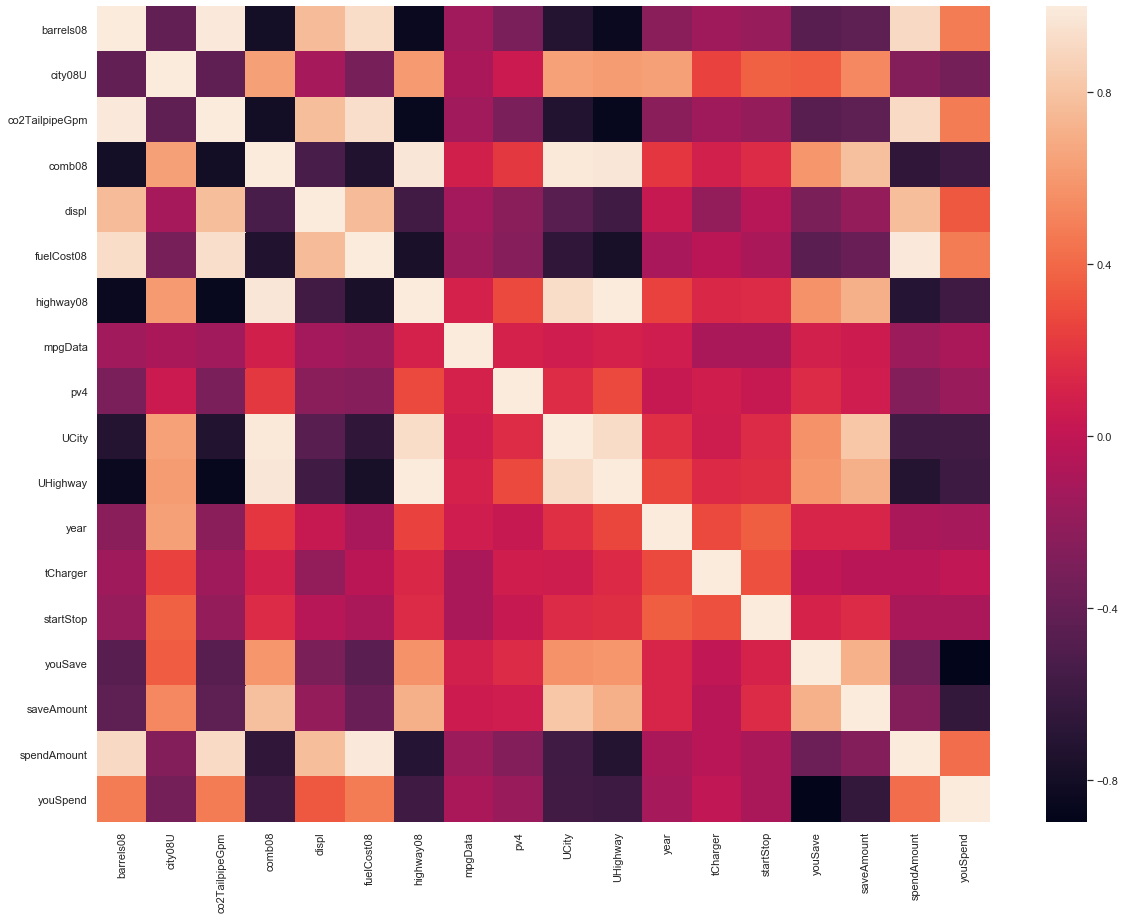

<Figure size 432x288 with 0 Axes>

In [303]:
num_cols = [x for x in vehicles_df.columns if x not in obj_cols]

plt.figure(figsize = (20,15))
sns.heatmap(data=vehicles_df[num_cols].corr())
plt.show()
plt.gcf().clear()

Apparently, there are multiple positive and negative correlation, let's focus on our target variable (UCity)

- UCity has a -ve correlation with variable Barrels08 
- UCity has a -ve correlation with variable Cylynders
- UCity has a -ve correlation with variable displ fuelcost08

- UCity has a +ve correlation with variable city08 (makes sense it is city MPG for fuelType1 ). 

#### Wondering if this variable (city08) would be exist in test data sets in future prediction ot it is a kind of data leakage. It shows high correlation with the target variable. We tried both options, with and without city08. the performance didn't show high impact. 

#### Drop highly correlated independent variables

In [304]:
target = vehicles_df['UCity']
vehicles_df = vehicles_df.drop('UCity', 1)

In [305]:
# Drop all correlated columns 
# Create correlation matrix
corr_matrix = vehicles_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#upper
# Find index of feature columns with correlation greater than 0.95
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(cols_to_drop)

# Copy dataframe to another frame

# Drop features 
vehicles_df.drop(cols_to_drop, inplace=True, axis=1)

vehicles_df['UCity'] =target

['co2TailpipeGpm', 'highway08', 'UHighway', 'spendAmount']


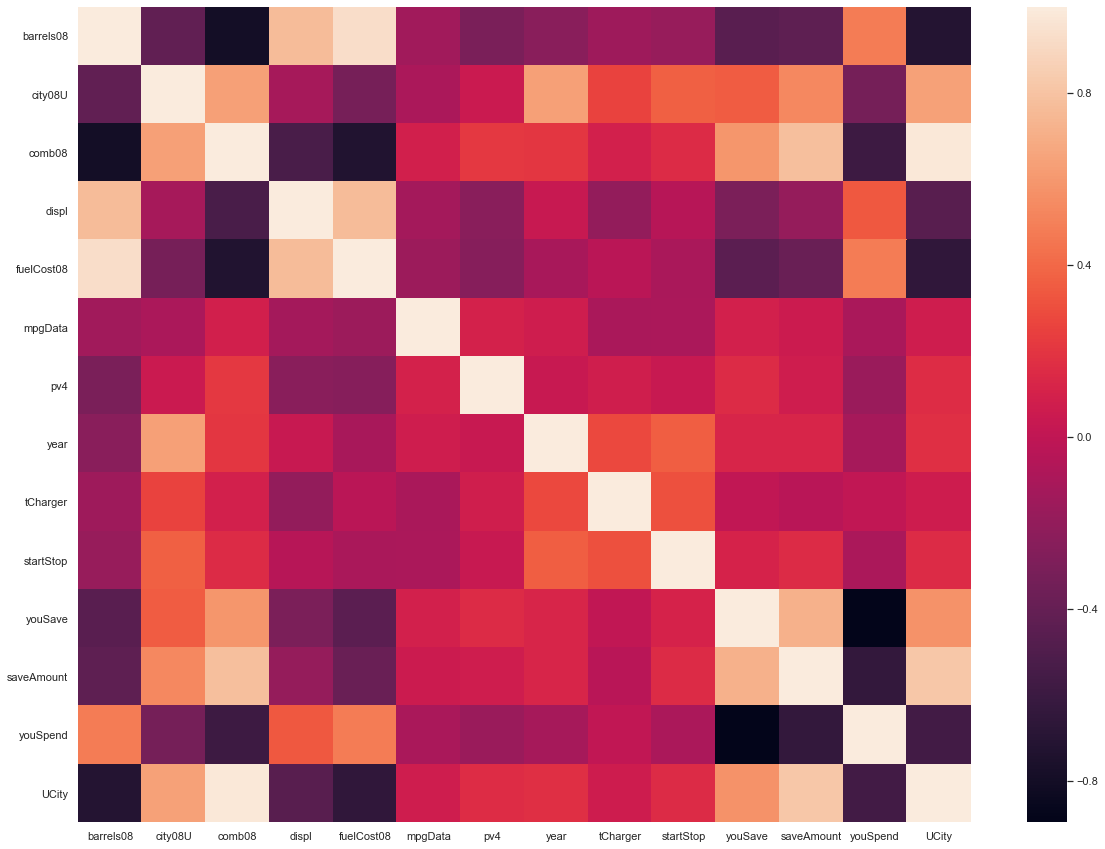

<Figure size 432x288 with 0 Axes>

In [306]:
#Check heatmap again after removing correlated independent variables
num_cols = [x for x in vehicles_df.columns if x not in obj_cols]

plt.figure(figsize = (20,15))
sns.heatmap(data=vehicles_df[num_cols].corr())
plt.show()
plt.gcf().clear()

#### Drop Outliers Records

- Check the UCity across different type of fuelType

[Text(0, 0, 'Regular'),
 Text(0, 0, 'Premium'),
 Text(0, 0, 'Diesel'),
 Text(0, 0, 'CNG'),
 Text(0, 0, 'Gasoline or natural gas'),
 Text(0, 0, 'Gasoline or E85'),
 Text(0, 0, 'Electricity'),
 Text(0, 0, 'Premium or E85'),
 Text(0, 0, 'Midgrade'),
 Text(0, 0, 'Premium Gas or Electricity'),
 Text(0, 0, 'Regular Gas and Electricity'),
 Text(0, 0, 'Premium and Electricity'),
 Text(0, 0, 'Regular Gas or Electricity')]

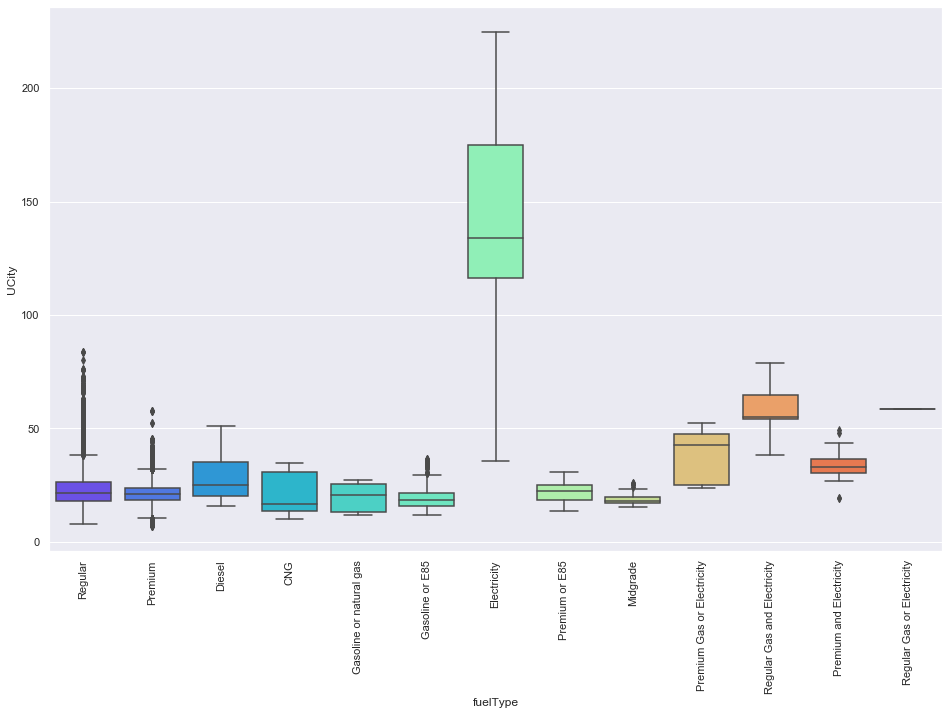

In [307]:
plt.figure(figsize=(16, 10))
g= sns.boxplot(x='fuelType',y='UCity',data=vehicles_df,palette='rainbow')
lables=vehicles_df['fuelType'].unique()
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [308]:
vehicles_df.reset_index(inplace=True,drop=True)

In [309]:
def get_outliers(df, col, threshold=1.5):
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    min_low  = q1-threshold*iqr
    max_high = q3+threshold*iqr
    return df.loc[(df[col] > max_high) | (df[col] < min_low), col] 

In [310]:
outliers_UCity = get_outliers(vehicles_df,'UCity')
print(outliers_UCity.min())
print(outliers_UCity.max())

63.9
224.8


In [311]:
outliers_UCity_df = vehicles_df.iloc[list(outliers_UCity.index)]
outliers_UCity_df.fuelType.value_counts()

Electricity                    162
Regular                         52
Regular Gas and Electricity      9
Name: fuelType, dtype: int64

- Apparently, most of the Electric Car (fuelType:Electricity) UCity (MPGe) value is higher than normal fueltype cars, the above code considered it as an outlier which is not correct. So, in the mean time, we will not cosider these records as outliers and continue the modeling to test the performance. We can check other alternative as future task.

In [312]:
fuel_types_uniq = vehicles_df.fuelType.unique()

for fuel_type in fuel_types_uniq:
    print(f"Fuel Type: {fuel_type}")
    print(vehicles_df[vehicles_df['fuelType']==fuel_type]['UCity'].describe())

Fuel Type: Regular
count    25996.000000
mean        22.868272
std          6.984553
min          8.000000
25%         18.100000
50%         21.735750
75%         26.200000
max         83.559800
Name: UCity, dtype: float64
Fuel Type: Premium
count    11067.000000
mean        21.337866
std          5.171396
min          7.000000
25%         18.400000
50%         21.000000
75%         23.836700
max         57.500000
Name: UCity, dtype: float64
Fuel Type: Diesel
count    1142.000000
mean       27.755046
std         8.675039
min        16.000000
25%        20.000000
50%        25.150000
75%        35.200000
max        51.000000
Name: UCity, dtype: float64
Fuel Type: CNG
count    54.000000
mean     20.801989
std       8.928926
min      10.100000
25%      13.500000
50%      16.700000
75%      31.000000
max      34.800000
Name: UCity, dtype: float64
Fuel Type: Gasoline or natural gas
count    12.000000
mean     19.669675
std       6.202044
min      11.665500
25%      13.366500
50%      20.700

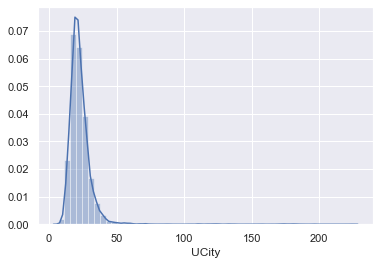

In [313]:
# Check UCity distribution
sns.distplot(vehicles_df['UCity'])

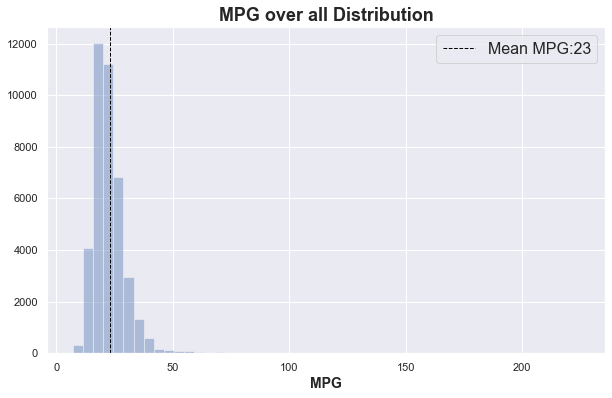

In [314]:
# Check UCity distribution
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.distplot(vehicles_df.UCity,kde=False)
plt.xlabel('MPG',fontsize=14,fontweight="bold")
plt.axvline(vehicles_df.UCity.mean(),lw=1,ls='dashed',
            color='black',label='Mean MPG:'+'{0:.0f}'.format(np.mean(vehicles_df.UCity)))
plt.title('MPG over all Distribution',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [315]:
for col in num_cols:
    print(col)
    print(vehicles_df[col].value_counts())

barrels08
18.311667    3798
17.347895    3552
15.695714    3458
16.480500    3323
19.388824    2498
             ... 
3.795078        1
9.178874        1
0.546000        1
7.263876        1
5.640081        1
Name: barrels08, Length: 192, dtype: int64
city08U
0.0000     29637
18.3385       60
18.1170       59
14.8182       58
19.0003       55
           ...  
12.4732        1
23.5759        1
20.6382        1
14.8169        1
21.9604        1
Name: city08U, Length: 3655, dtype: int64
comb08
18     3871
19     3643
21     3527
20     3360
17     2644
       ... 
115       1
130       1
94        1
65        1
126       1
Name: comb08, Length: 87, dtype: int64
displ
2.0    4063
3.0    3219
2.5    2486
2.4    1994
3.5    1638
       ... 
8.3       9
0.9       6
0.6       6
7.4       4
0.0       1
Name: displ, Length: 67, dtype: int64
fuelCost08
2850    3385
2350    3169
2250    2627
2000    2585
2100    2145
        ... 
7350       5
3600       4
6450       4
2950       2
3400       1
Name

### Exploratory Analysis

In [316]:
vehicles_df.reset_index(inplace=True,drop=True)

- Distribution of Car Model year across the dataset

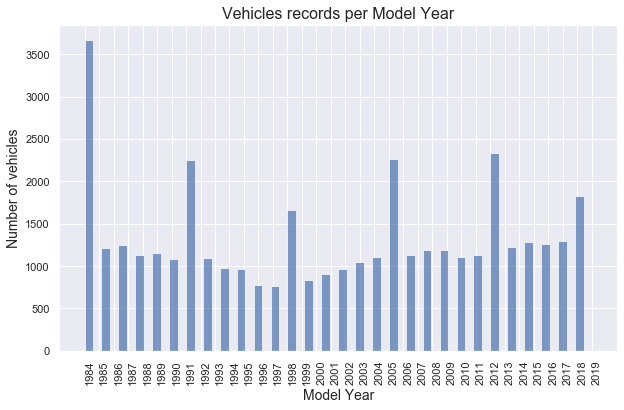

In [317]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
g=sns.distplot(vehicles_df.year,kde=False, hist_kws={"alpha":0.7,'width':0.6})
plt.title('Vehicles records per Model Year',fontsize=16)
plt.xticks(sorted(vehicles_df.year.unique()),horizontalalignment='left',rotation='vertical')
plt.ylabel('Number of vehicles',fontsize=14)
plt.xlabel('Model Year', fontsize=14)
plt.show()


- More exploratory analysis for the data

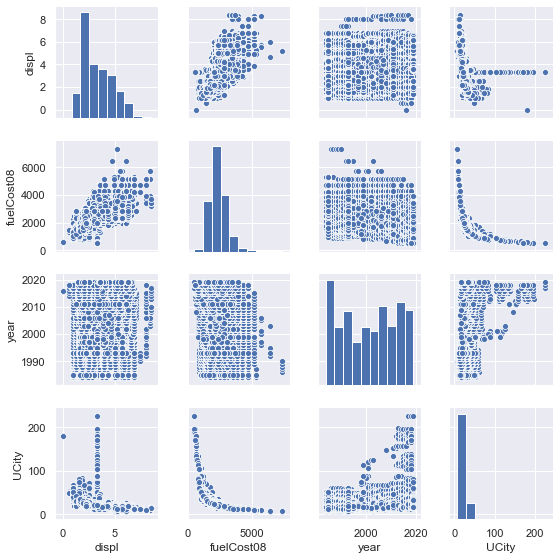

In [318]:
#scatterplot
scatter_cols = ['displ','fuelCost08','year','UCity']
sns.set()
vehicles_df[scatter_cols]
sns.pairplot(vehicles_df[scatter_cols], size = 2.0)
plt.show()

#### Notes from the Scatterplot
- there is a linear relation between displ (engine displacement in liters), fuel cost cylinders variables. 
- Also, linear relation between fuelcost and cylinders variables. 
- Vehicles with 4 cylinders have the highest MPG across all.
- Vehicles with more than 10 cylinders have the lowest MPG across all data

### Answer Assignment Questions

#### Q1:Which manufacturer produces the most fuel efficient fleet of cars?

#### A1: We would assume here that the purpose of the question is to find out the manufacturer with highest mean of MPG (UCity) across all its fleet of cars produced since 1984 (as per the data set). 

#### After plotting the boxplot and generating aggregates for all manufacturers (Maker) and sort the values based on the MPG average, Tesla manufacturer shows up in the top of the list. Its boxplot is consistent and doesn't have various values like in Smart Manufacturer

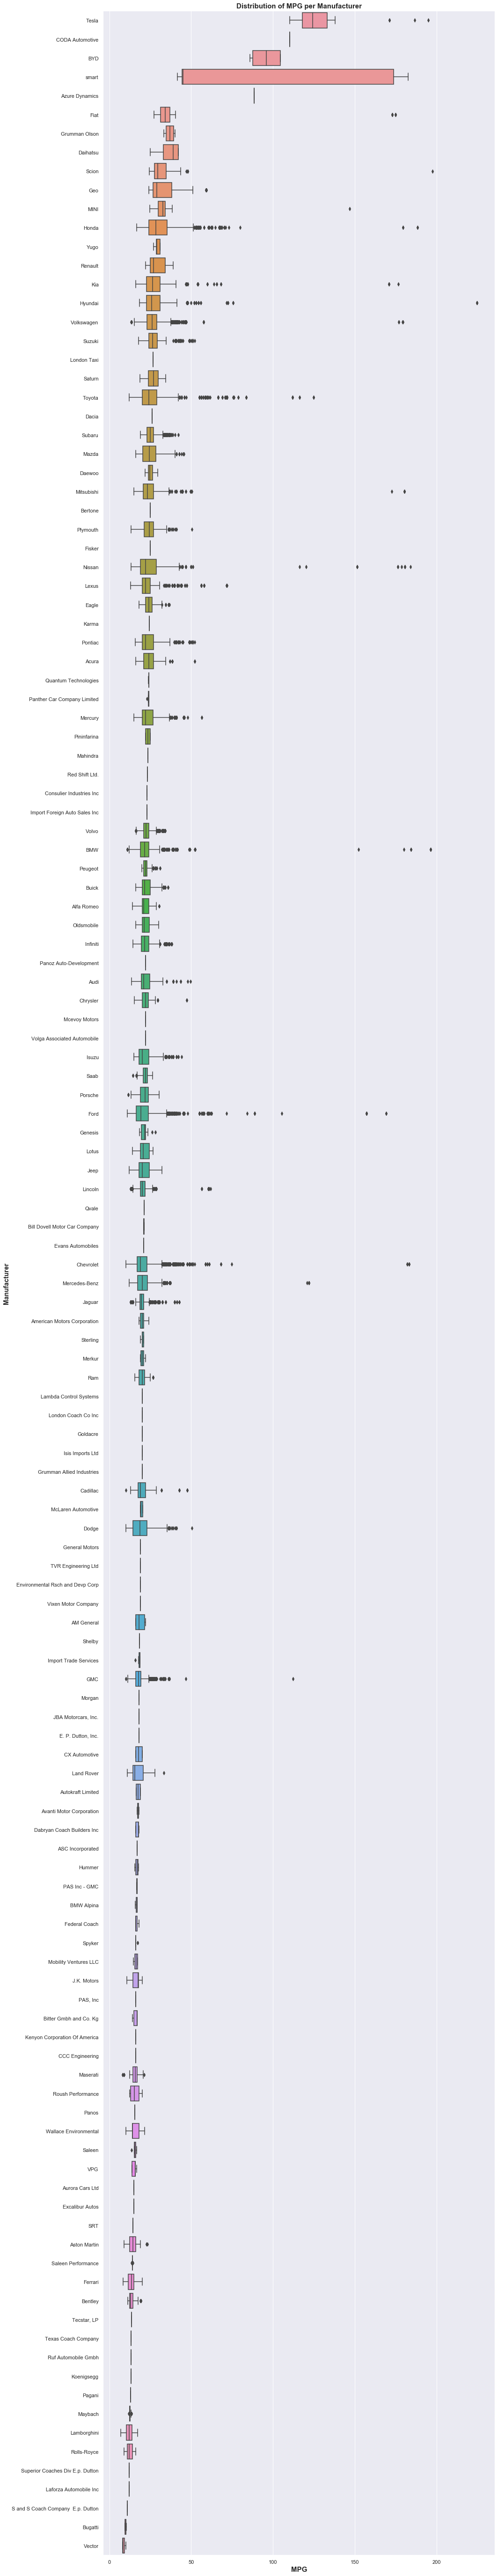

In [319]:
vehicles_df.reset_index(inplace=True,drop=True)
#Rank the UCity mean after grouping by make (Manufacturer) fleet
ranks = vehicles_df.groupby("make")["UCity"].mean().fillna(0).sort_values()[::-1].index
# look at MPG by make 
fig = plt.figure(figsize=(15,100))
ax = fig.gca()
sns.boxplot(x='UCity',y='make',data=vehicles_df,orient='h', order = ranks)
plt.xlabel('MPG',fontsize=15,fontweight="bold")
plt.ylabel('Manufacturer',fontsize=14,fontweight="bold")
plt.title('Distribution of MPG per Manufacturer',fontsize=15,fontweight="bold")
plt.show()

In [320]:
vehicles_df.groupby('make').agg({'UCity': ['min', 'max','mean']}).sort_values(('UCity', 'mean'), ascending=False).head(1)

UCity                   
         min    max        mean
make                           
Tesla  110.4  195.0  127.505172

- The above box plot diagram shows high MPG variations with each Manufacteurer. The MPG of most of the car fleet of each manufacteurer ranges under ~50 MPG with some exceptions that sometimes has a higher range more than ~100 MPG and not surprisngly most of these exceptions are Electric Cars

#### Q2: Build a model to predict city mpg (variable “UCity” in column BG).

#### A2: Here are the steps that will be followed:
- Ensure all variables are converted into numeric value
    - Convert the categorical variables into on-hot-encoded
    - Scale the numeric variables
    - Split the data into training and test
    - traing the model
    - check the model performance

In [321]:
#take a copy of the data for extra analysis
extra_analysis_df= vehicles_df.copy()
#Scale numeric variables except the target variable
for col in num_cols:    
    if col in ['UCity']: 
        continue
    else:
        vehicles_df[col] = vehicles_df[col].fillna(vehicles_df[col].mean())
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(vehicles_df[[col]])
        vehicles_df[col] = pd.DataFrame(x_scaled)
vehicles_df.describe()

,barrels08,city08U,comb08,displ,fuelCost08,...,startStop,youSave,saveAmount,youSpend,UCity
count,40056.000000,40056.000000,40056.000000,40056.000000,40056.000000,...,40056.000000,40056.000000,40056.000000,40056.000000,40056.000000
mean,0.367924,0.036655,0.104391,0.392897,0.274066,...,0.066956,0.070976,0.015898,0.913197,22.996141
std,0.097594,0.073537,0.056135,0.161428,0.094885,...,0.249949,0.256787,0.080663,0.281550,10.460958
min,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000
25%,0.303460,0.000000,0.077519,0.261905,0.211679,...,0.000000,0.000000,0.000000,1.000000,18.125900
50%,0.349171,0.000000,0.100775,0.357143,0.270073,...,0.000000,0.000000,0.000000,1.000000,21.300000
75%,0.411014,0.081869,0.124031,0.511905,0.321168,...,0.000000,0.000000,0.000000,1.000000,25.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,224.800000


#### Preparing categorical Variables

- Some categorical variable has high cardinality (>50 unique values). There are multiple techniques to handle this issue. wil llist some of them below :

- 1) one hot encoding for only subset of the feature unique values
    - Keep top used values (using a threshold)
    - The encode remaining values with "others" value
- 2) Use Hashing 

- 3) Use Target Encoding
- 4) Use Binary encoding

Due to time limitation, we will be using the first technique, encode subset of the top used values as one-hot-encoding and assign "Others" to reminaing values

In [322]:
# take a copy of the fuelType column
fuel_type= vehicles_df['fuelType']

In [323]:
# Create a comined make-model feature to make sure we have a unique model values
vehicles_df['mk_mdl'] = "["+vehicles_df['make'].map(str) + '] - ' + vehicles_df['model'].map(str)
vehicles_df = vehicles_df.drop(['model'], axis=1)
obj_cols = list(vehicles_df.loc[:, (vehicles_df.dtypes == object) ].columns)

In [324]:
threshold = 10
obj_cols = list(vehicles_df.loc[:, (vehicles_df.dtypes == object) ].columns)
for col in obj_cols:
    if len(vehicles_df[col].unique()) >threshold:
        top_index = vehicles_df[col].value_counts()[:threshold].index
        vehicles_df.loc[~vehicles_df[col].isin(top_index), col] = "Others"

- Explore the categorical variable before encodig them into one-hot-encoding

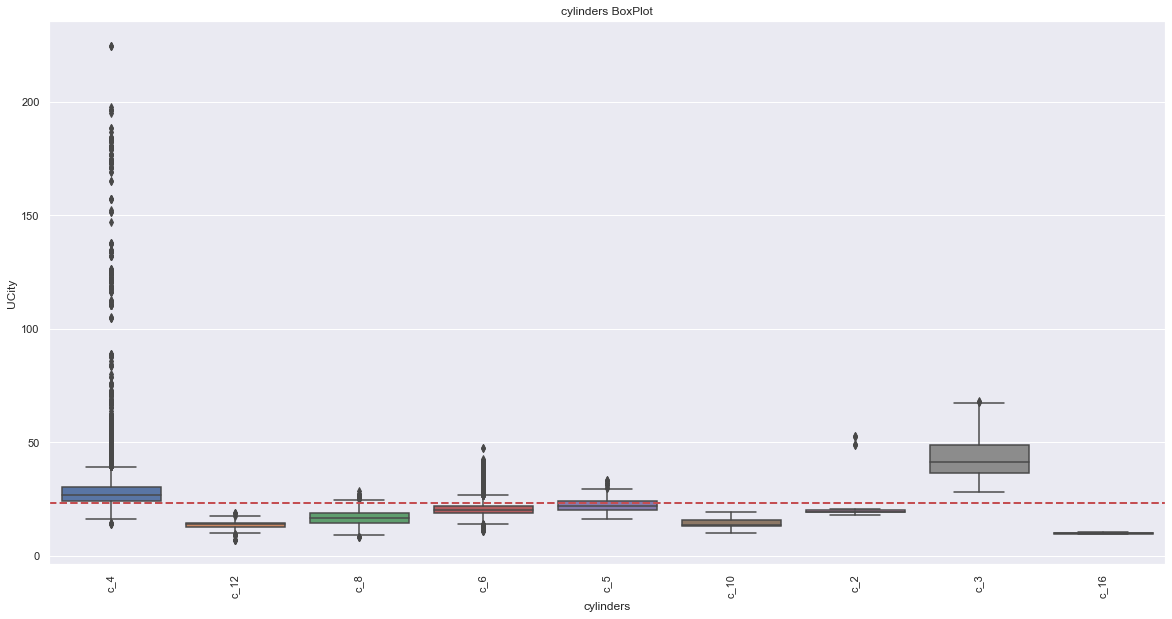

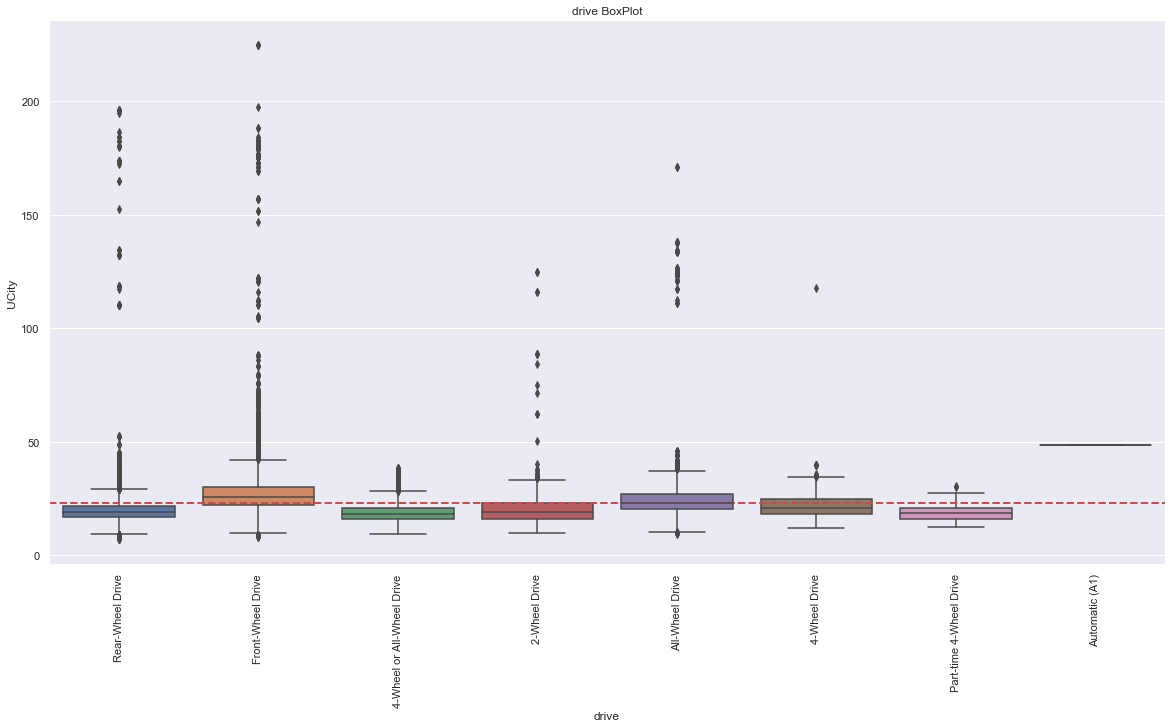

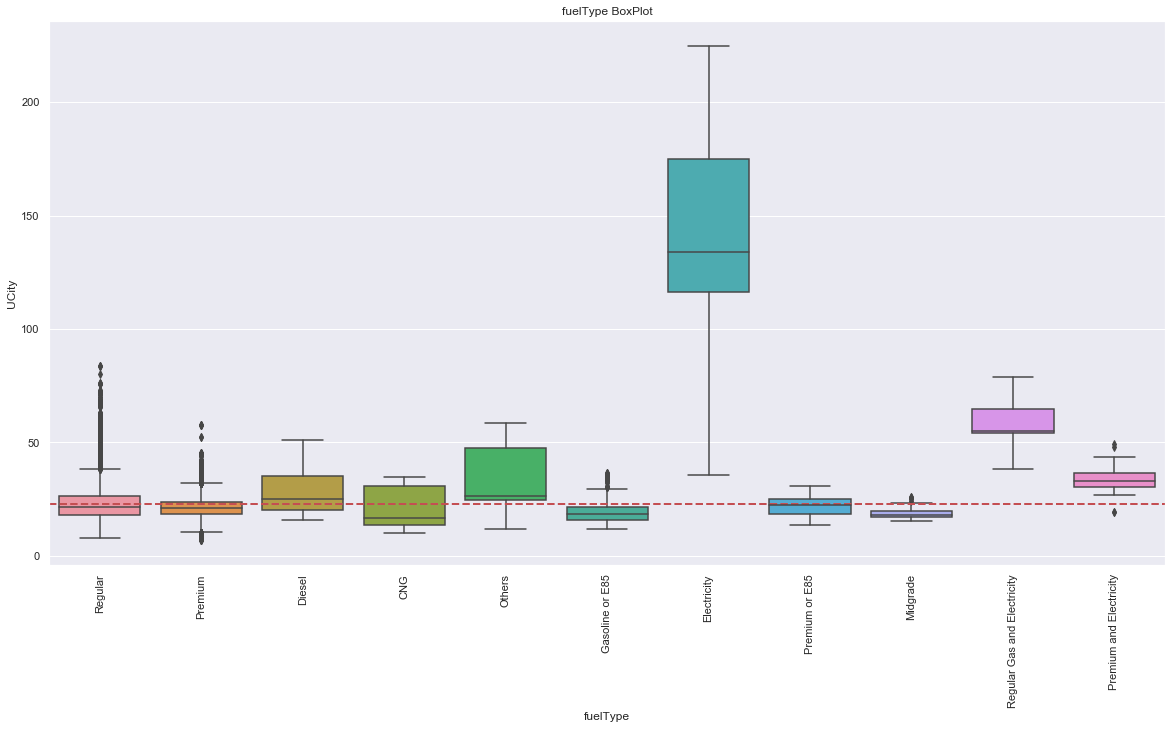

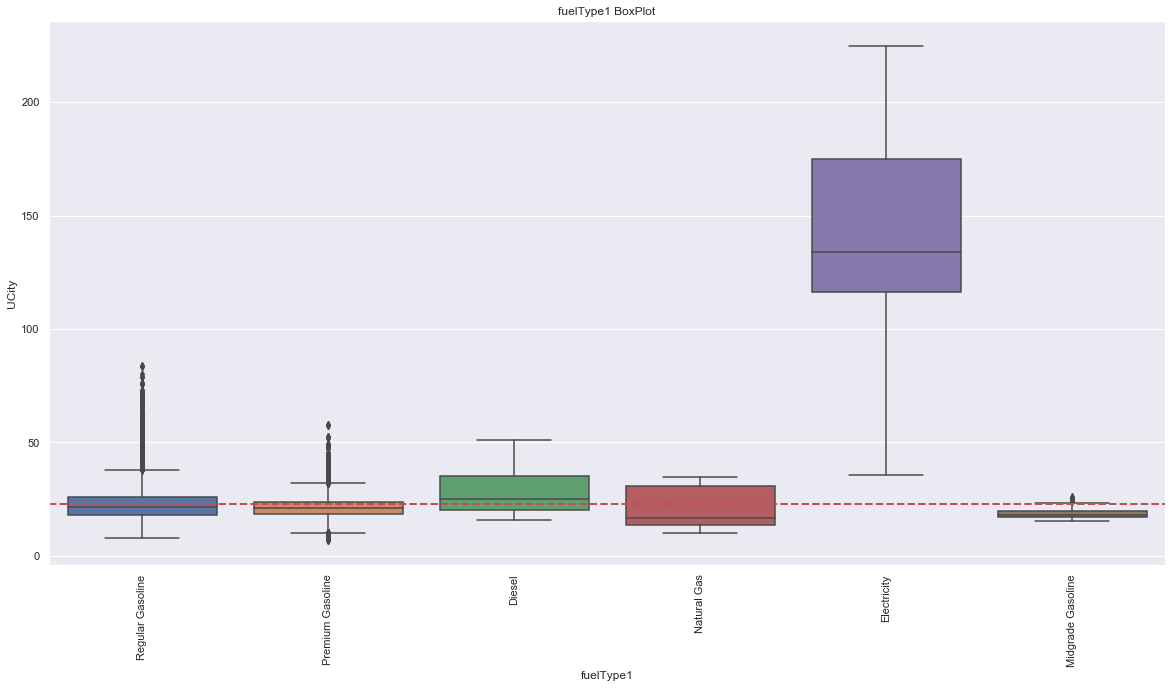

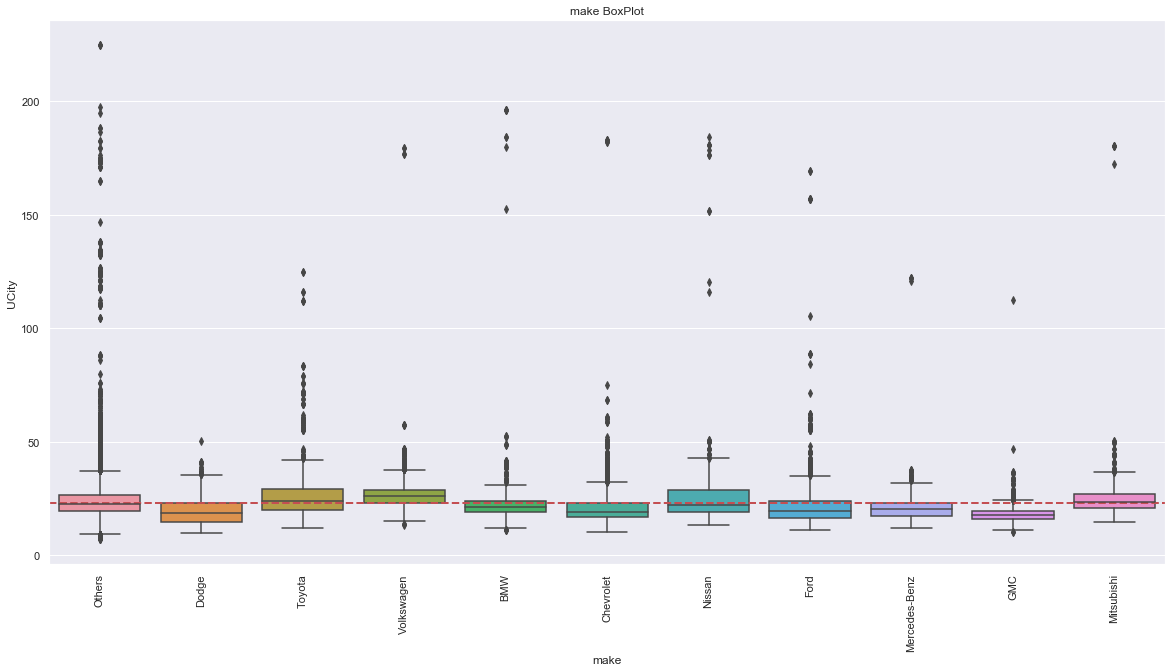

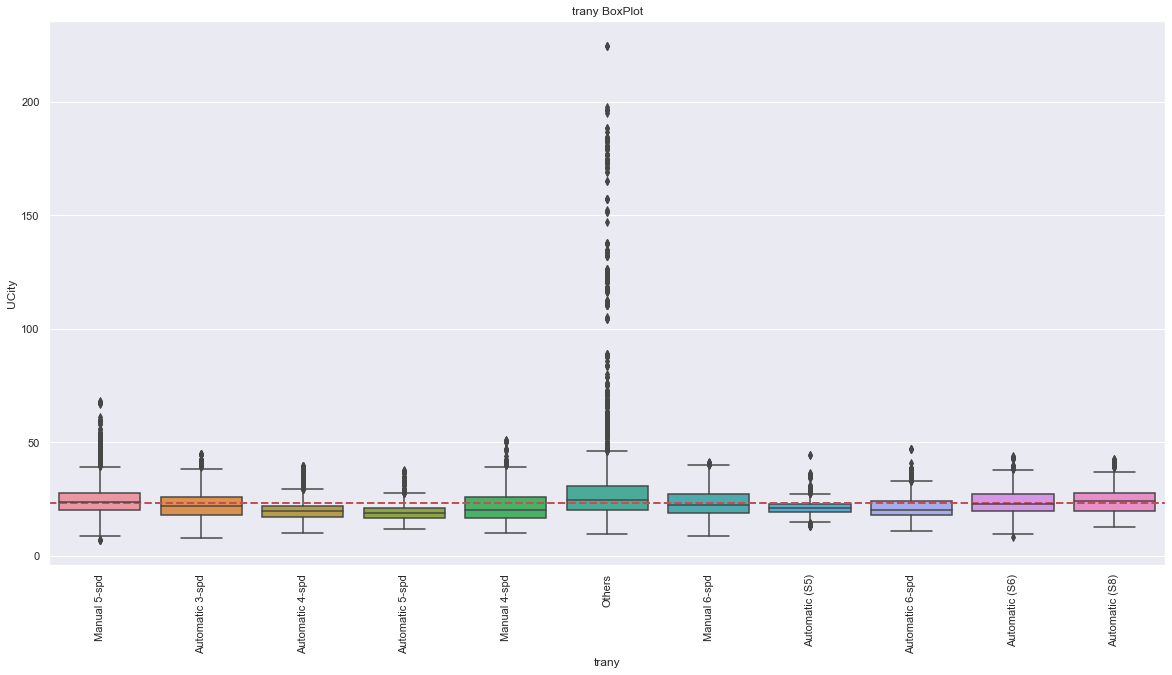

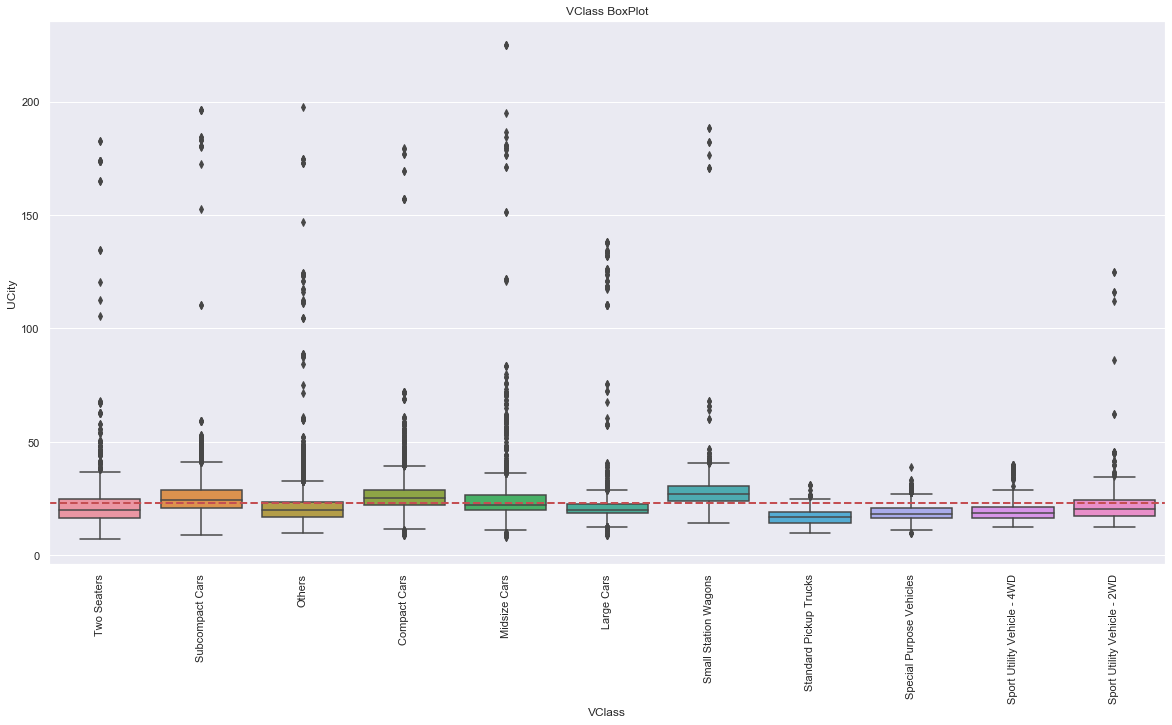

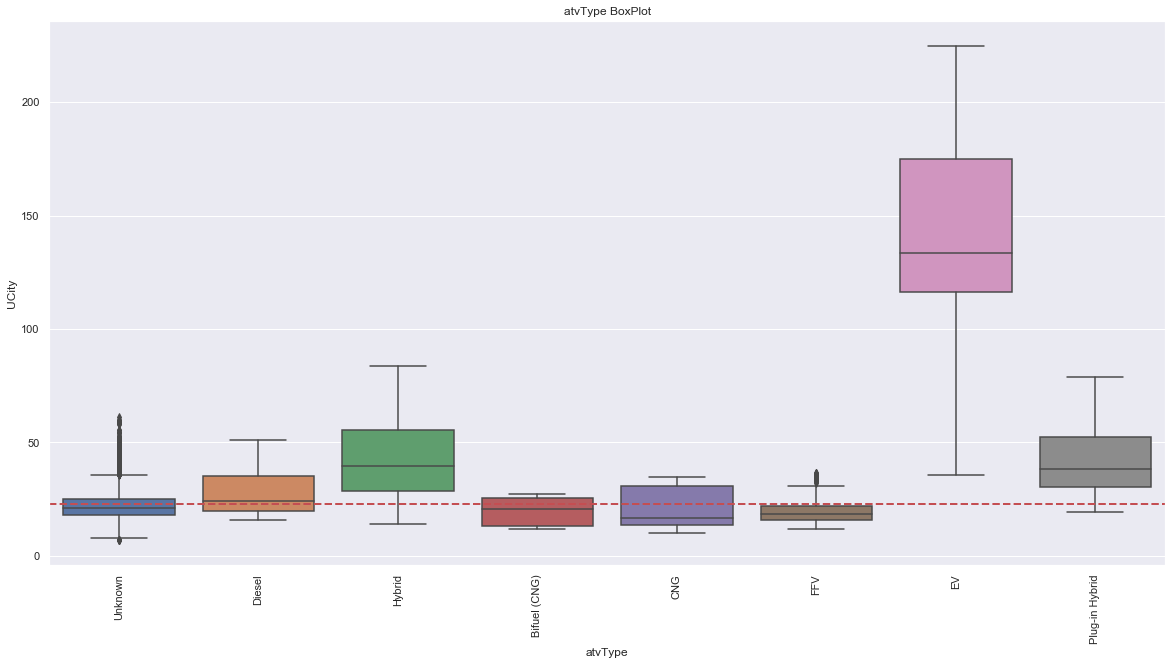

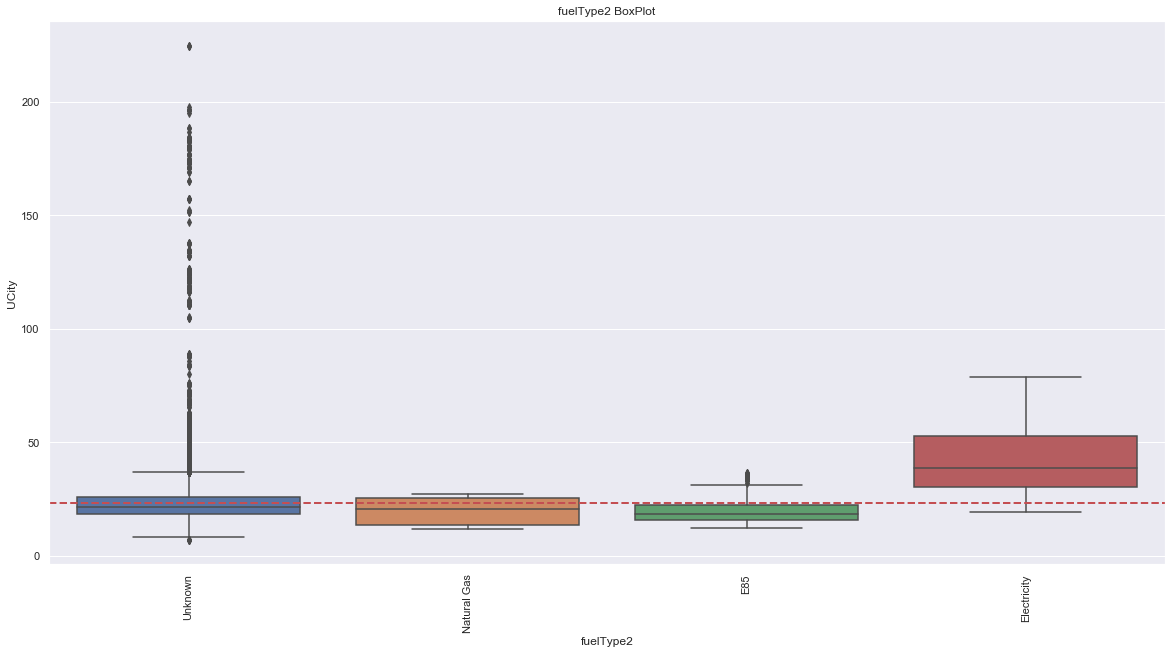

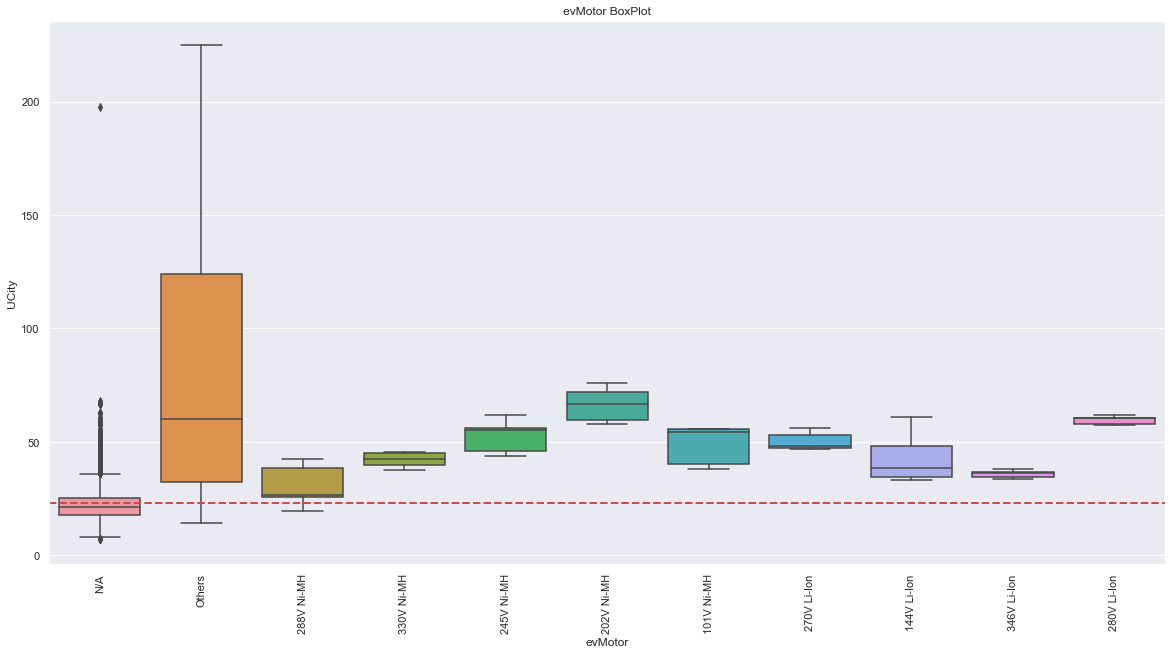

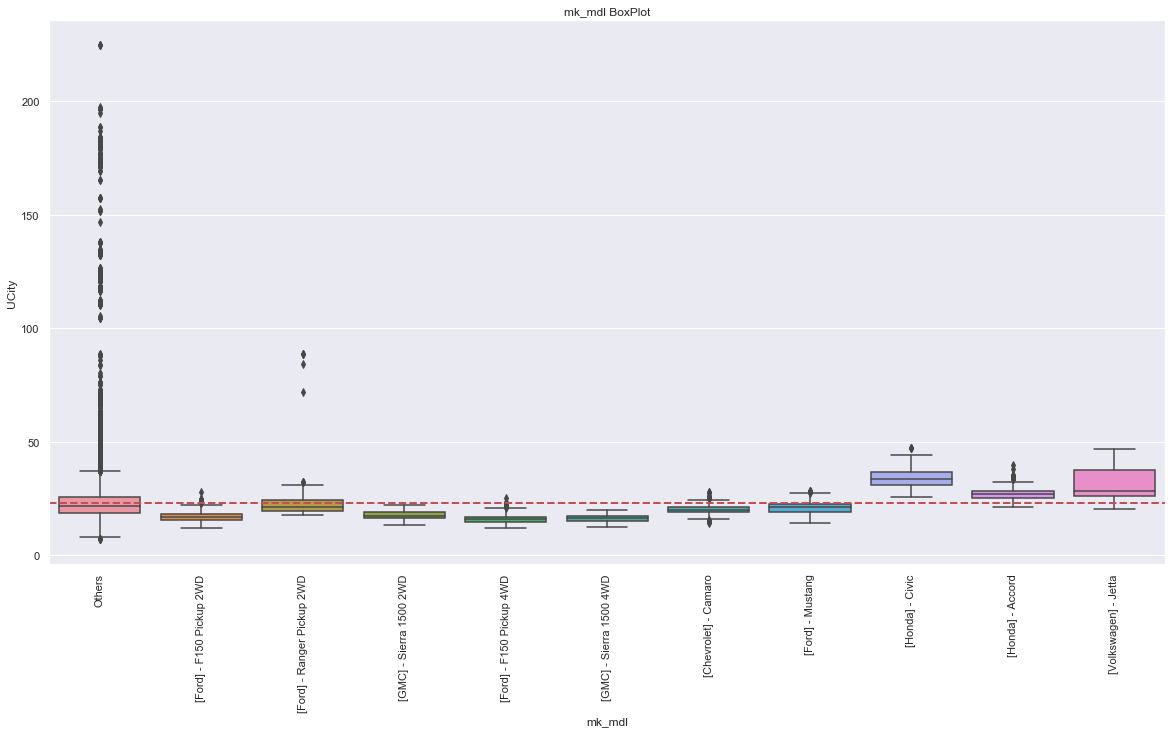

In [325]:
for col in obj_cols:
    f, ax = plt.subplots(figsize=(20,10))
    fig = sns.boxplot(x=col, y="UCity", data=vehicles_df[[col,'UCity']])
    plt.title(f'{col } BoxPlot')
    fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.axhline(vehicles_df.UCity.mean(),color='r',linestyle='dashed',linewidth=2)

In [326]:
def OneHotEncoder(df, colList):
    c2 = []
    for c in colList:
        if df[c].nunique()>2 :
            c2.append(c)
    df = pd.get_dummies(df,columns=c2,drop_first=True)
    return df

In [327]:
print(vehicles_df.shape)
vehicles_df_new = OneHotEncoder(vehicles_df,obj_cols )
print(vehicles_df_new.shape)
vehicles_df_new.reset_index(inplace=True,drop=True)

(40056, 25)
(40056, 104)


In [328]:
vehicles_df_new.head(10)

,barrels08,city08U,comb08,displ,fuelCost08,...,mk_mdl_[GMC] - Sierra 1500 2WD,mk_mdl_[GMC] - Sierra 1500 4WD,mk_mdl_[Honda] - Accord,mk_mdl_[Honda] - Civic,mk_mdl_[Volkswagen] - Jetta
0,0.332483,0.0,0.108527,0.238095,0.218978,...,0,0,0,0,0
1,0.635900,0.0,0.031008,0.583333,0.489051,...,0,0,0,0,0
2,0.258314,0.0,0.155039,0.261905,0.153285,...,0,0,0,0,0
3,0.635900,0.0,0.031008,0.619048,0.489051,...,0,0,0,0,0
4,0.367615,0.0,0.093023,0.261905,0.321168,...,0,0,0,0,0
5,0.317312,0.0,0.116279,0.214286,0.211679,...,0,0,0,0,0
6,0.279081,0.0,0.139535,0.214286,0.175182,...,0,0,0,0,0
7,0.290763,0.0,0.131783,0.190476,0.182482,...,0,0,0,0,0
8,0.268298,0.0,0.147287,0.190476,0.167883,...,0,0,0,0,0
9,0.279081,0.0,0.139535,0.214286,0.175182,...,0,0,0,0,0


#### Stratified sampling

##### fueltype is an important feature since it differentiate between the electric cars (fueltype:Electricity) and other normal cars. so we need to make sure it is well represented in both trianing and test data sets

In [329]:
vehicles_df_new['fuelType']=fuel_type
final_vehicles_df = vehicles_df_new.drop('UCity', axis=1)
final_target = vehicles_df_new['UCity']

In [330]:
# use stratify parameter to specify the column to use to generate a stratified split
X_train, X_test, y_train, y_test =train_test_split(final_vehicles_df,final_target,test_size =0.30
                                                   , random_state=41, stratify=vehicles_df_new['fuelType'])

- Validate the train/test are stratified

In [331]:
print(vehicles_df_new.fuelType.value_counts()/len(vehicles_df_new))
print(X_train.fuelType.value_counts()/len(X_train))
print(X_test.fuelType.value_counts()/len(X_test))

Regular                        0.648991
Premium                        0.276288
Gasoline or E85                0.032080
Diesel                         0.028510
Electricity                    0.004194
                                 ...   
Premium and Electricity        0.001173
Regular Gas and Electricity    0.000724
Premium Gas or Electricity     0.000699
Gasoline or natural gas        0.000300
Regular Gas or Electricity     0.000075
Name: fuelType, Length: 13, dtype: float64
Regular                        0.648989
Premium                        0.276294
Gasoline or E85                0.032062
Diesel                         0.028496
Electricity                    0.004208
                                 ...   
Premium and Electricity        0.001177
Premium Gas or Electricity     0.000713
Regular Gas and Electricity    0.000713
Gasoline or natural gas        0.000285
Regular Gas or Electricity     0.000071
Name: fuelType, Length: 13, dtype: float64
Regular                        0.6

- The ouput split (fuel_type) is similar

In [332]:
# drop fuelType var from both train & test
X_train =X_train.drop('fuelType', axis=1)
X_test =X_test.drop('fuelType', axis=1)

### Training The Model

#### Train Linear Regression Model

In [333]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

r_square = regressor.score(X_test, y_test)

print(f"Linear Regression R Squared output: {r_square}")

y_pred=regressor.predict(X_test)
lr_mse=mean_squared_error(y_pred,y_test)
lr_rmse = np.sqrt(lr_mse)

print(f"Linear Regression rmse output: {lr_rmse}")

Linear Regression R Squared output: 0.9884189508789539
Linear Regression rmse output: 1.1263676775745433


- The Linear Regression results is good..rmse error is around 1.13 MPG

#### Try Gradient Boosting Regressor

In [334]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

r_square = gb_model.score(X_test, y_test)

print(f"Gradient Boosting R Squared output: {r_square}")

y_pred=gb_model.predict(X_test)
gb_mse=mean_squared_error(y_pred,y_test)
gb_rmse = np.sqrt(gb_mse)

print(f"Gradient Boosting rmse output: {gb_rmse}")

Gradient Boosting R Squared output: 0.9955152706453059
Gradient Boosting rmse output: 0.7009295140232706


The Gradient Boosting results is better..rmse error is around 0.7 MPG

#### Train Neural Network

In [335]:
vehicles_df_nn= vehicles_df_new.drop('fuelType', axis=1)
train_dataset = vehicles_df_nn.sample(frac=0.75,random_state=0)
test_dataset = vehicles_df_nn.drop(train_dataset.index)

In [336]:
train_stats = train_dataset.describe()
train_stats.pop("UCity")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
barrels08,30042.0,0.367598,0.097554,0.000000,0.303460,0.349171,0.411014,1.0
city08U,30042.0,0.036897,0.073342,0.000000,0.000000,0.000000,0.083939,1.0
comb08,30042.0,0.104515,0.056127,0.000000,0.077519,0.100775,0.124031,1.0
displ,30042.0,0.392579,0.161087,0.071429,0.261905,0.357143,0.511905,1.0
fuelCost08,30042.0,0.273817,0.094673,0.000000,0.211679,0.270073,0.321168,1.0
...,...,...,...,...,...,...,...,...
mk_mdl_[GMC] - Sierra 1500 2WD,30042.0,0.003961,0.062814,0.000000,0.000000,0.000000,0.000000,1.0
mk_mdl_[GMC] - Sierra 1500 4WD,30042.0,0.003362,0.057886,0.000000,0.000000,0.000000,0.000000,1.0
mk_mdl_[Honda] - Accord,30042.0,0.003828,0.061753,0.000000,0.000000,0.000000,0.000000,1.0
mk_mdl_[Honda] - Civic,30042.0,0.003895,0.062286,0.000000,0.000000,0.000000,0.000000,1.0


In [337]:
train_labels = train_dataset.pop('UCity')
test_labels = test_dataset.pop('UCity')

In [338]:
normed_train_data=train_dataset
normed_test_data=test_dataset

In [339]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

In [340]:
normed_train_data.describe()

,barrels08,city08U,comb08,displ,fuelCost08,...,mk_mdl_[GMC] - Sierra 1500 2WD,mk_mdl_[GMC] - Sierra 1500 4WD,mk_mdl_[Honda] - Accord,mk_mdl_[Honda] - Civic,mk_mdl_[Volkswagen] - Jetta
count,30042.000000,30042.000000,30042.000000,30042.000000,30042.000000,...,30042.000000,30042.000000,30042.000000,30042.000000,30042.000000
mean,0.367598,0.036897,0.104515,0.392579,0.273817,...,0.003961,0.003362,0.003828,0.003895,0.004627
std,0.097554,0.073342,0.056127,0.161087,0.094673,...,0.062814,0.057886,0.061753,0.062286,0.067865
min,0.000000,0.000000,0.000000,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.303460,0.000000,0.077519,0.261905,0.211679,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.349171,0.000000,0.100775,0.357143,0.270073,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.411014,0.083939,0.124031,0.511905,0.321168,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000


- Check the model first

In [341]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

    return model

In [342]:
model = build_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                6656      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [343]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.11282083],
       [ 0.06673165],
       [ 0.3243469 ],
       [ 0.15558594],
       [ 0.1667776 ],
       [ 0.19896175],
       [-0.03983596],
       [ 0.06087517],
       [ 0.04163483],
       [ 0.07047392]], dtype=float32)

- Traing the model for 300 epochs

In [98]:
EPOCHS = 300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:53.3798,  mae:2.9457,  mse:53.3798,  val_loss:6.3361,  val_mae:1.5879,  val_mse:6.3361,  
....................................................................................................
Epoch: 100, loss:0.4274,  mae:0.4539,  mse:0.4274,  val_loss:1.2608,  val_mae:0.8507,  val_mse:1.2608,  
....................................................................................................
Epoch: 200, loss:0.3466,  mae:0.4065,  mse:0.3466,  val_loss:0.5366,  val_mae:0.4885,  val_mse:0.5366,  
....................................................................................................

- Visualize the model's training progress using the stats stored in the history object.

In [100]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
290,0.311483,0.385306,0.311483,0.594543,0.540762,0.594543,290
291,0.313358,0.383018,0.313358,0.753861,0.642306,0.753861,291
292,0.311028,0.382238,0.311028,0.569803,0.532360,0.569803,292
293,0.316198,0.385752,0.316198,0.583950,0.472936,0.583949,293
294,0.308083,0.381305,0.308083,0.552713,0.519354,0.552714,294
295,0.313495,0.382468,0.313495,0.678081,0.542793,0.678081,295
296,0.304336,0.381598,0.304336,0.519530,0.436675,0.519530,296
297,0.320026,0.381741,0.320026,0.465949,0.445563,0.465949,297
298,0.309882,0.382628,0.309882,0.565348,0.492604,0.565349,298
299,0.302092,0.382388,0.302092,0.565127,0.462045,0.565127,299


In [101]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

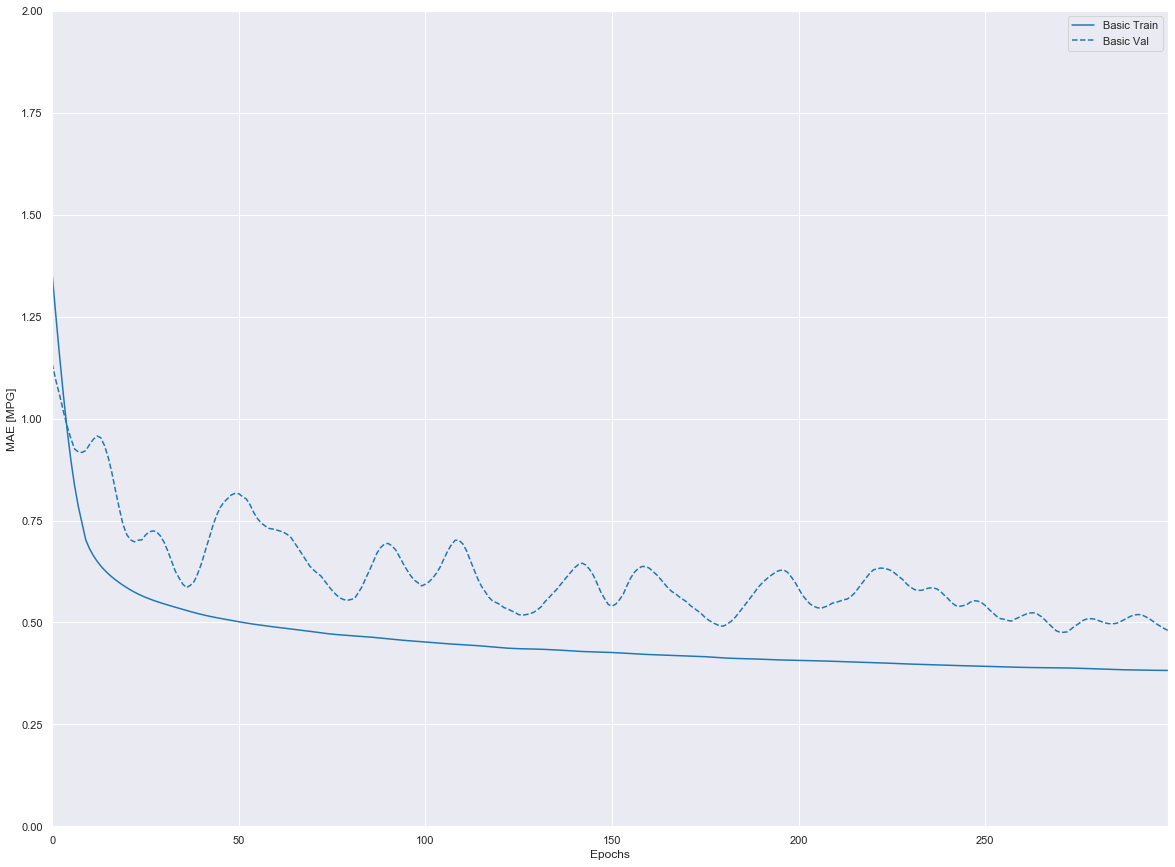

In [106]:
plt.figure(figsize = (20,15))
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 2])
plt.ylabel('MAE [MPG]')

- The Basic validation show Zig-zagging signals
This could be a result of noisy data so the algorithm oftentimes lear noise instead of the actual signal. The noise pattern, almost always, is different in the validation set compared to the training set. 

- One solution to decrease zig-zagging is trying to use larger batches during training. the other solution is trying to make the train/validation split more consistent

Text(0, 0.5, 'MSE [MPG^2]')

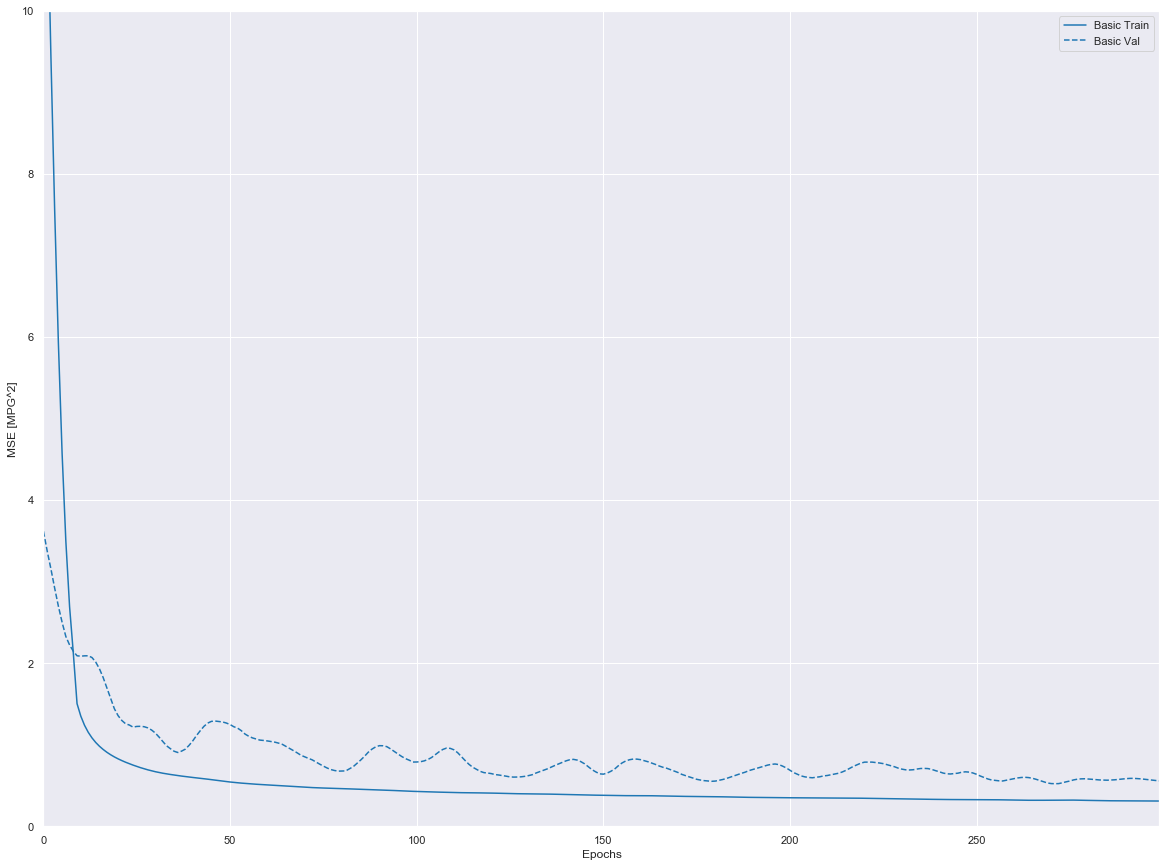

In [107]:
plt.figure(figsize = (20,15))
plotter.plot({'Basic': history}, metric = "mse")

plt.ylim([0, 10])
plt.ylabel('MSE [MPG^2]')

This graph shows little improvement, or even degradation in the validation error after about 40 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

In [108]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:53.7208,  mae:3.1770,  mse:53.7208,  val_loss:6.7264,  val_mae:1.6487,  val_mse:6.7264,  
..................................

Text(0, 0.5, 'MAE [MPG]')

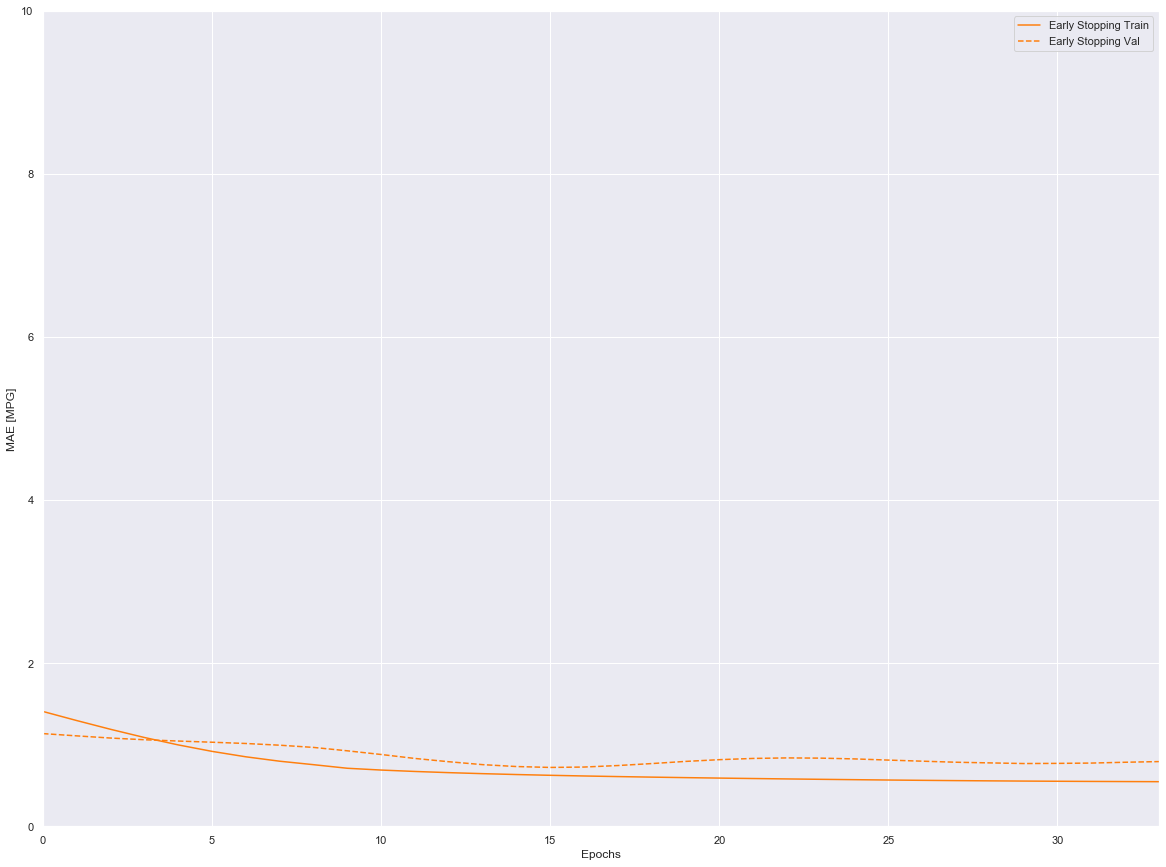

In [109]:
plt.figure(figsize = (20,15))
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

In [110]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

10014/10014 - 0s - loss: 1.2703 - mae: 0.8880 - mse: 1.2703
Testing set Mean Abs Error:  0.89 MPG


- Make Predictions

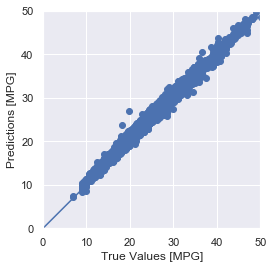

In [111]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

(-5, 5)

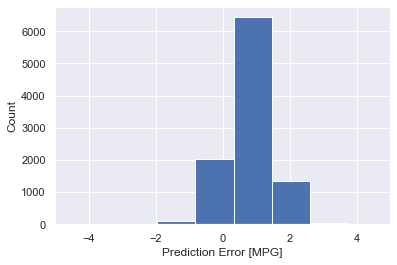

In [113]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
lims = [-5, 5]
plt.xlim(lims)

- It's not quite gaussian, the prediction error ranges between -2 and +2 which is perfect as a result

#### Q3 How has fuel economy changed over time? Are there any other interesting insights or trends?

#### A3: Let's now check how the fuel economy has changed over time

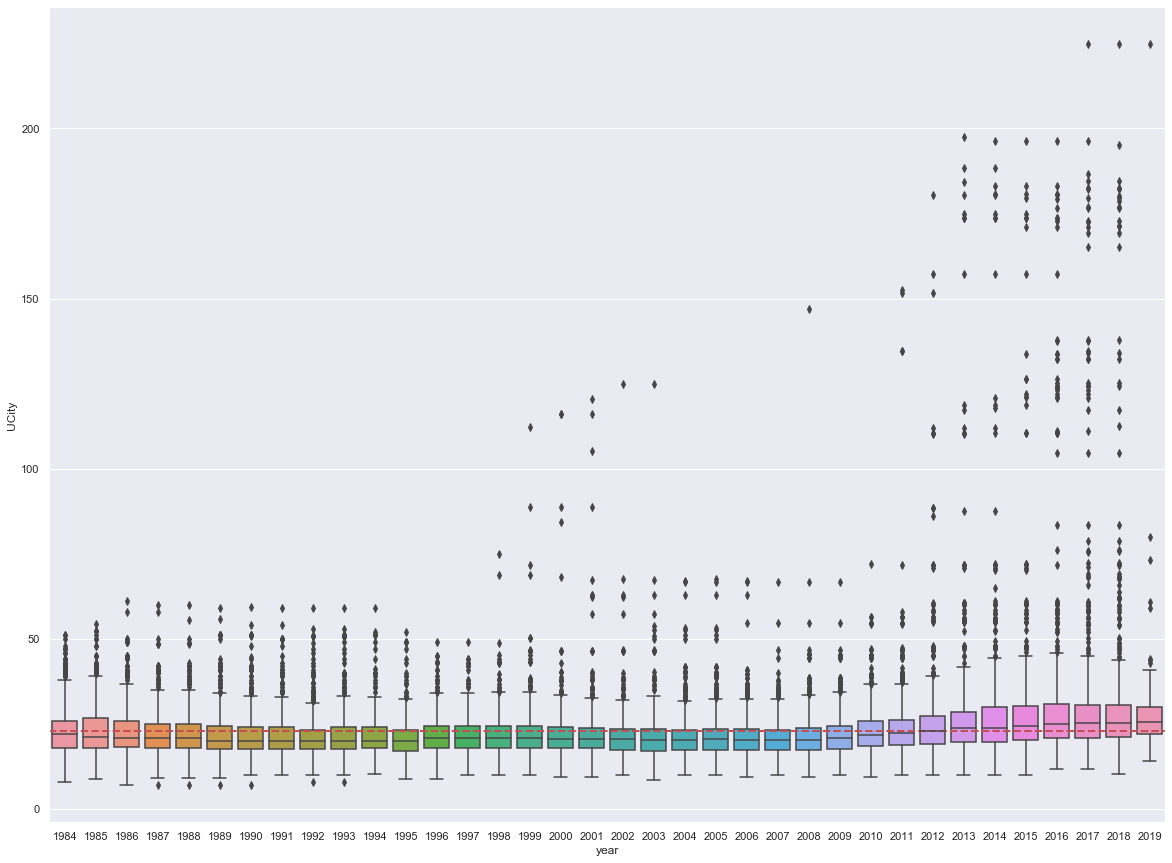

In [182]:
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x="year", y="UCity", data=extra_analysis_df[['UCity','year']])
plt.axhline(extra_analysis_df.UCity.mean(),color='r',linestyle='dashed',linewidth=2)

#### (A3) [Continued]: The dashed red line marks the mean of the overall veichles MPG. 
- From the plot above we can notice the following:
    - Before Year 1998 the max MPG hrough all year ranged between ~50 & ~60 (even between outliers)
    - Starting from year 2000 the MPG jumped over 100 and started to increase for a couple of years and returned back to range between ~60 & 70
    - Starting from 2011 the MPG jumped to a newer high level, reached ~200 with more electric cars invented by multiple manufacturers till it reached the peak in 2019 at ~224 MPGe MPGe (Miles Per Gallon Equivalent) which shows how far a vehicle will drive on 33.7 kWh of electricity — the energy equivalent of one gallon of gasoline.  
    - The MPG in this data doesn't match the normal registered MPGe in google
    https://www.fueleconomy.gov/feg/topten.jsp

- To add more analysis for this question, we can compare the MPG for models before year 2000 with the same models produced in 2019

In [210]:
# take 4 years period to compare models, this wil ensure most of the models are released within 4 years period
extra_analysis_df['mk_mdl'] = "["+extra_analysis_df['make'].map(str) + '] - ' + extra_analysis_df['model'].map(str)
vehicles_1997_2000_df =extra_analysis_df[(extra_analysis_df['year'] <=2000) & (extra_analysis_df['year'] >=1997)]
vehicles_2016_2019_df =extra_analysis_df[(extra_analysis_df['year'] <=2019) & (extra_analysis_df['year'] >=2016)]

In [211]:
# old Manufacturers
print(len(vehicles_1997_2000_df.make.unique()))

# new Manufacturers
print(len(vehicles_2016_2019_df.make.unique()))

48
51


In [212]:
# old models
print(len(vehicles_1997_2000_df.mk_mdl.unique()))

# old models
print(len(vehicles_2016_2019_df.mk_mdl.unique()))

594
1263


- let's join both datasets and compare same models perfromance. 

In [213]:
vehicles_1997_2000_df.rename(columns=lambda x: x + "_97_00", inplace=True)
vehicles_2016_2019_df.rename(columns=lambda x: x + "_16_19", inplace=True)

vehicles_compare = vehicles_1997_2000_df.merge(vehicles_2016_2019_df, left_on='mk_mdl_97_00', right_on='mk_mdl_16_19', how='inner')

agg_cols= {'UCity_97_00_min':'UCity_97_00_min','UCity_97_00_max':'UCity_97_00_max','UCity_97_00_mean':'UCity_97_00_mean',
          'UCity_16_19_min':'UCity_16_19_min','UCity_16_19_max':'UCity_16_19_max','UCity_16_19_mean':'UCity_16_19_mean'
          }
grouped_vehicles_compare= vehicles_compare[['mk_mdl_97_00','UCity_97_00','UCity_16_19']].groupby(['mk_mdl_97_00']).agg({'UCity_97_00': ['min', 'max','mean'], 'UCity_16_19':['min', 'max','mean']}).sort_values(('UCity_16_19', 'mean'), ascending=False)

grouped_vehicles_compare.columns = grouped_vehicles_compare.columns.map('_'.join)
grouped_vehicles_compare = grouped_vehicles_compare.reset_index().rename(columns=agg_cols)
grouped_vehicles_compare['UCity_mean_increase_pct'] =100*(grouped_vehicles_compare['UCity_16_19_mean']-grouped_vehicles_compare['UCity_97_00_mean'])/grouped_vehicles_compare['UCity_97_00_mean']


- let's sort by the highest MPG mean percentage increase and get the top 10 model MPG increase (Year 1996-200 VS Year 2016-2019)

In [251]:
grouped_vehicles_compare.sort_values('UCity_mean_increase_pct', ascending=False)[['mk_mdl_97_00','UCity_mean_increase_pct']].head(10)

,mk_mdl_97_00,UCity_mean_increase_pct
50,[Porsche] - 911 Turbo,63.696786
14,[Audi] - A6,60.186452
48,[Land Rover] - Discovery,55.615697
56,[Land Rover] - Range Rover,54.491774
1,[Mitsubishi] - Mirage,47.294590
41,[Jeep] - Grand Cherokee 2WD,46.354034
32,[BMW] - 740i,44.799541
11,[Hyundai] - Sonata,44.423536
42,[Nissan] - Pathfinder 4WD,42.850817
29,[Audi] - A6 quattro,41.808374


####  Analsyis Results:
- 3 new Manufacturer entered the market
- almost double the number of models were introduced in the last 4 years compared to last 4 years in the last century
- "[Porsche] - 911 Turbo" and "[Audi] - A6" models improved the fuel effiency (MPG) by more than 60%

### Extra Analysis

- Better fuel economy characteristics

In [344]:
extra_analysis_df.query('UCity > UCity.mean()').describe(include='all')

,barrels08,city08U,comb08,cylinders,displ,...,startStop,youSave,saveAmount,youSpend,UCity
count,16005.000000,16005.000000,16005.000000,16005,16005.000000,...,16005.0000,16005.000000,16005.000000,16005.000000,16005.000000
unique,NaN,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,c_4,NaN,...,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,13131,NaN,...,NaN,NaN,NaN,NaN,NaN
mean,13.402114,9.588921,25.721275,NaN,2.212706,...,0.1189,0.177632,208.887848,0.782755,29.800613
...,...,...,...,...,...,...,...,...,...,...,...
min,0.060000,0.000000,19.000000,NaN,0.000000,...,0.0000,0.000000,0.000000,0.000000,22.998000
25%,12.207778,0.000000,22.000000,NaN,1.800000,...,0.0000,0.000000,0.000000,1.000000,24.547500
50%,13.733750,0.000000,24.000000,NaN,2.000000,...,0.0000,0.000000,0.000000,1.000000,27.000000
75%,14.982273,20.746300,27.000000,NaN,2.500000,...,0.0000,0.000000,0.000000,1.000000,30.900000
